In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def split_json_objects(line):
    """Split concatenated JSON objects in a single line."""
    json_objects = []
    start = 0
    while start < len(line):
        try:
            obj, end = json.JSONDecoder().raw_decode(line[start:])
            json_objects.append(obj)
            start += end
        except json.JSONDecodeError:
            start += 1
    return json_objects


def read_jsonl(file_path):
    """Read JSONL data from a file."""
    data = []
    
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file):
            line = line.strip()
            if not line:
                continue

            try:
                # Try to parse the entire line as a single JSON object
                obj = json.loads(line)
                data.append(obj)
            except json.JSONDecodeError:
                # If parsing as a single object fails, try to find multiple objects
                objects = split_json_objects(line)
                if objects:
                    data.extend(objects)
                else:
                    print(f"Error parsing line {line_number}: {line}")

    return data


def draw_plot_for_x_y_with_smoothing(file_path, x_key, y_keys, window_size=5, log_scale=False):
    # Read JSONL data from file
    data = read_jsonl(file_path)

    plt.figure(figsize=(10, 6))
    if log_scale:
        plt.yscale('log')

    # Extract "step" and "total_loss" values
    x = [entry[x_key] for entry in data if x_key in entry]

    for y_key in y_keys:
        y = [entry[y_key] for entry in data if y_key in entry]

        # Apply simple moving average smoothing
        def moving_average(data, window_size):
            return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

        smoothed_y = moving_average(y, window_size)

        # Adjust the steps to match the smoothed data
        smoothed_x = x[window_size - 1:]

        # Plot the smoothed data
        
        plt.plot(smoothed_x, smoothed_y, marker='o', linestyle='-', label=y_key)
    plt.xlabel(x_key)
    plt.ylabel(y_keys)
    plt.title(f'{y_keys} vs. {x_key} (Smoothed)')
    plt.legend()
    plt.grid(True)
    plt.show()

def draw_plot_for_x_y_without_smoothing(file_path, x_key, y_keys, log_scale=False):
    # Read JSONL data from file
    data = read_jsonl(file_path)

    plt.figure(figsize=(10, 6))
    if log_scale:
        plt.yscale('log')
    # Extract "step" and "total_loss" values
    x = [entry[x_key] for entry in data if x_key in entry]
    for y_key in y_keys:
        y = [entry[y_key] for entry in data if y_key in entry]

        # Plot the smoothed data
        plt.plot(x, y, marker='o', linestyle='-', label=y_key)
        
    plt.xlabel(x_key)
    plt.ylabel(str(y_keys))
    plt.title(f'{y_keys} vs. {x_key} (Smoothed)')
    plt.legend()
    plt.grid(True)
    plt.show()

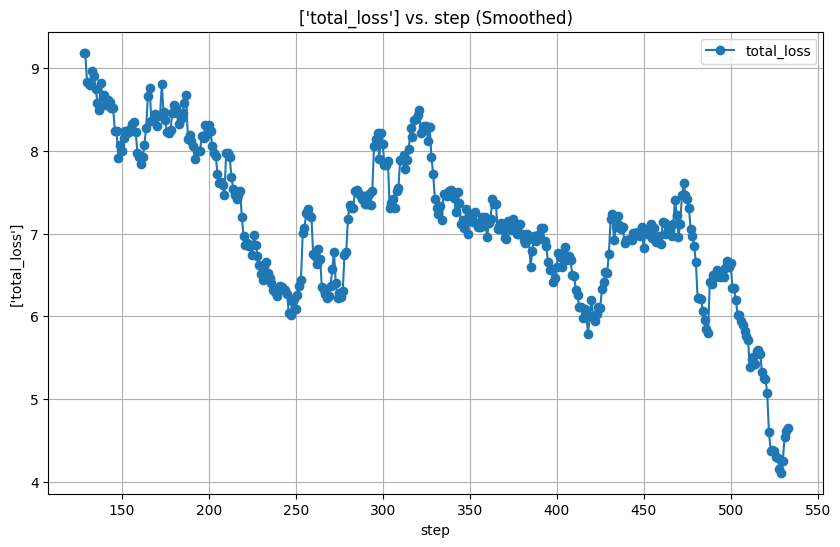

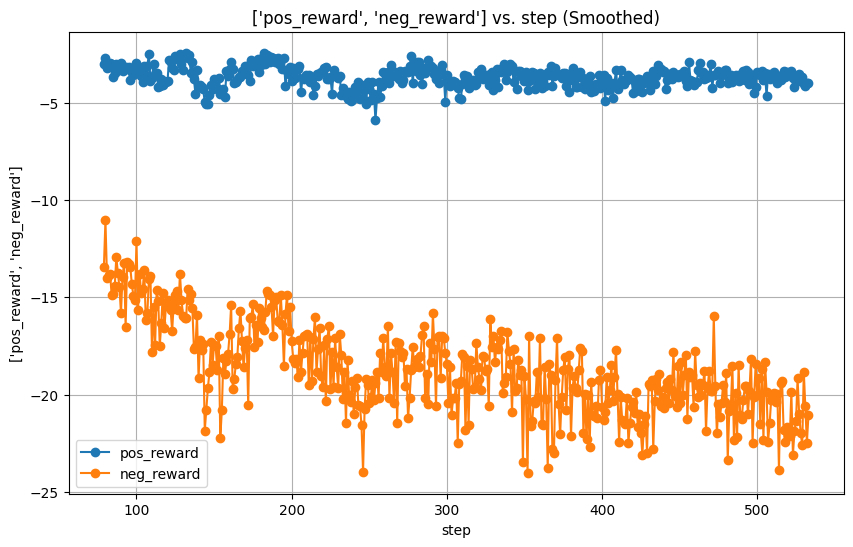

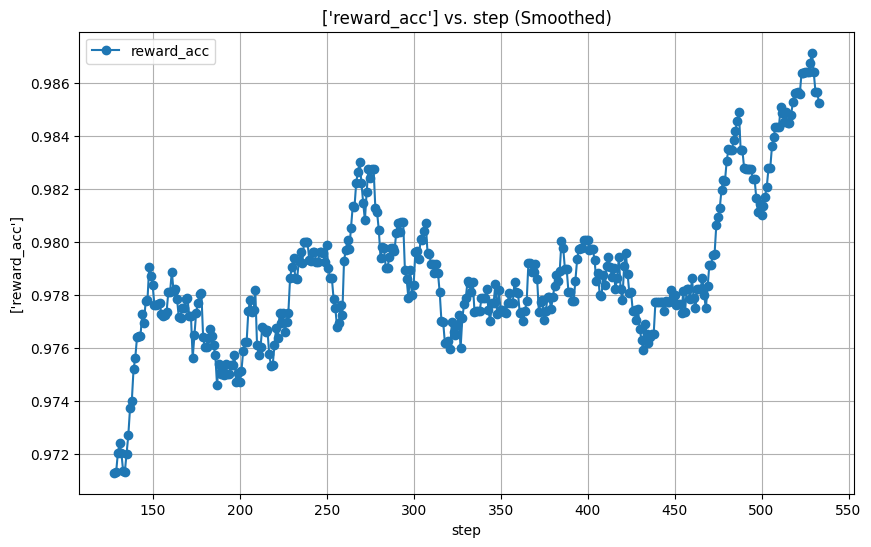

In [9]:
# File path
file_path = '/new_data/experiments/seungwook-phase1-merlinite-contrastive-bs64/training_params_and_metrics.jsonl'

draw_plot_for_x_y_with_smoothing(file_path, 'step', ['total_loss'], window_size=50)
draw_plot_for_x_y_without_smoothing(file_path, 'step', ['pos_reward', 'neg_reward'])
draw_plot_for_x_y_with_smoothing(file_path, 'step', ['reward_acc'], window_size=50)

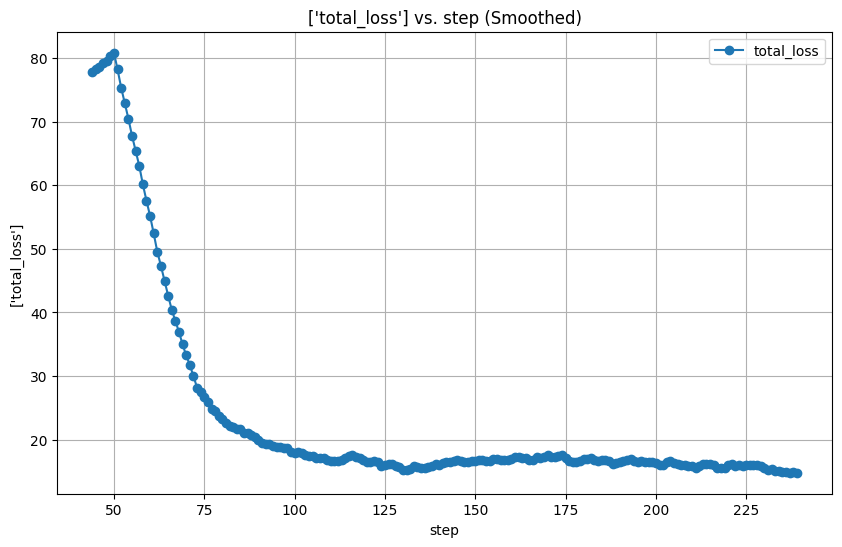

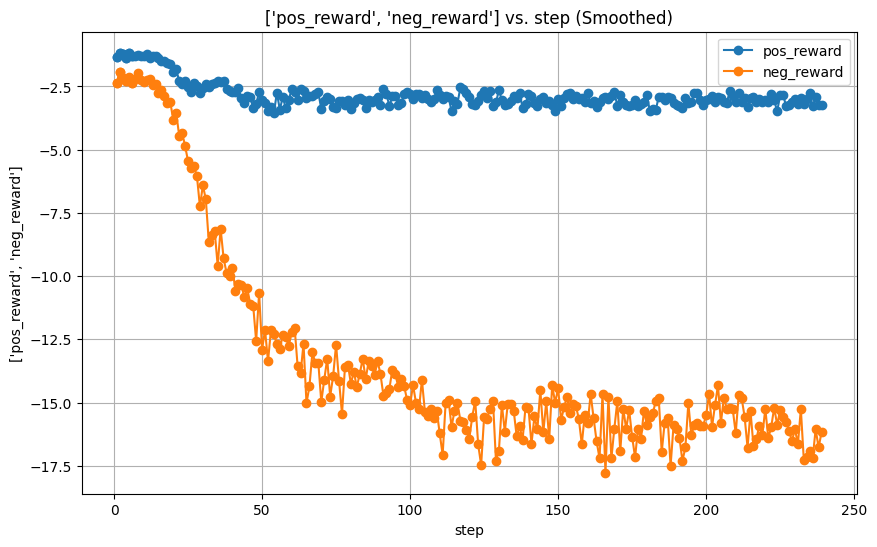

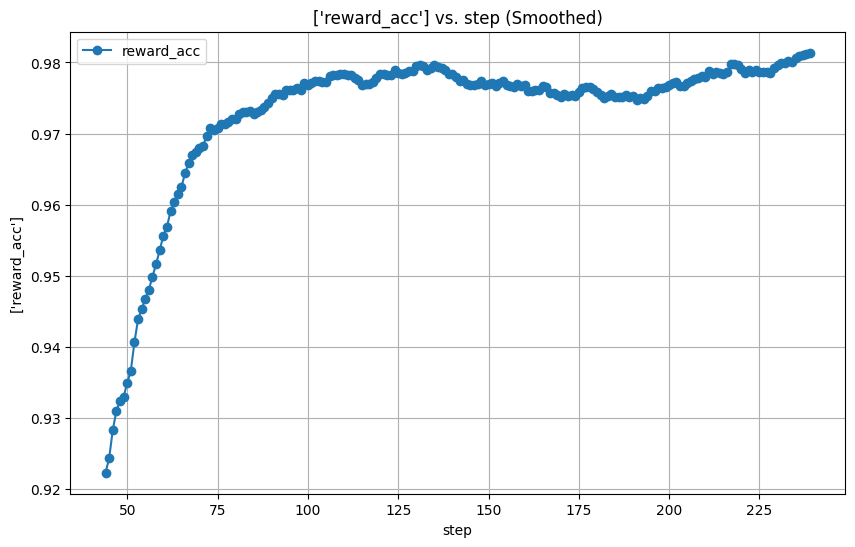

In [10]:
# File path
file_path = '/new_data/experiments/seungwook-phase1-merlinite-contrastive-bs128/training_params_and_metrics.jsonl'

draw_plot_for_x_y_with_smoothing(file_path, 'step', ['total_loss'], window_size=50)
draw_plot_for_x_y_without_smoothing(file_path, 'step', ['pos_reward', 'neg_reward'])
draw_plot_for_x_y_with_smoothing(file_path, 'step', ['reward_acc'], window_size=50)

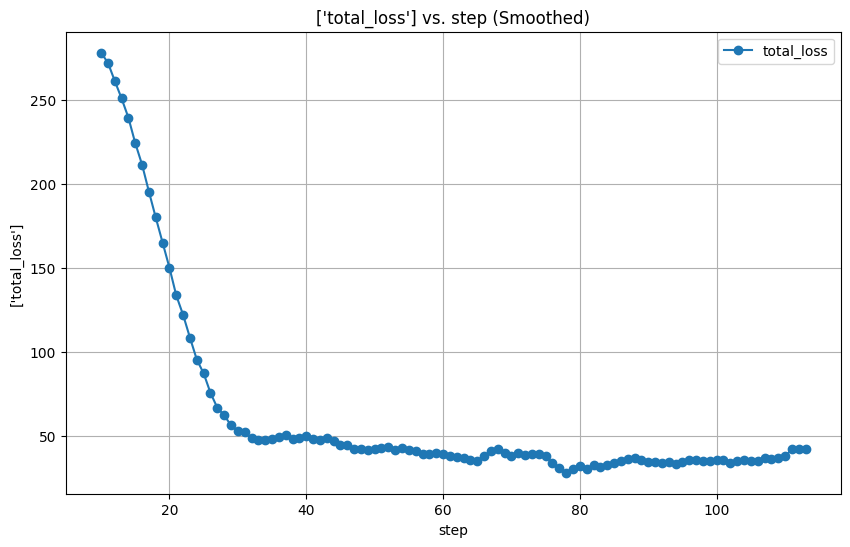

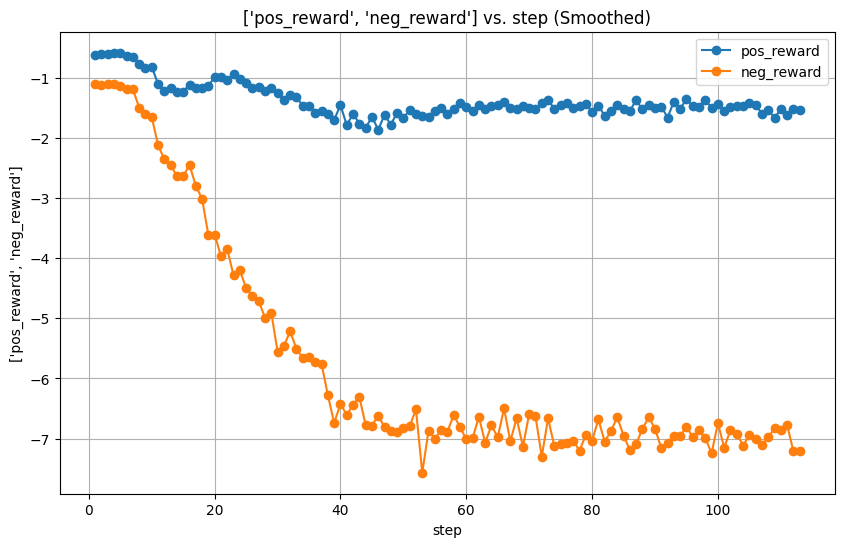

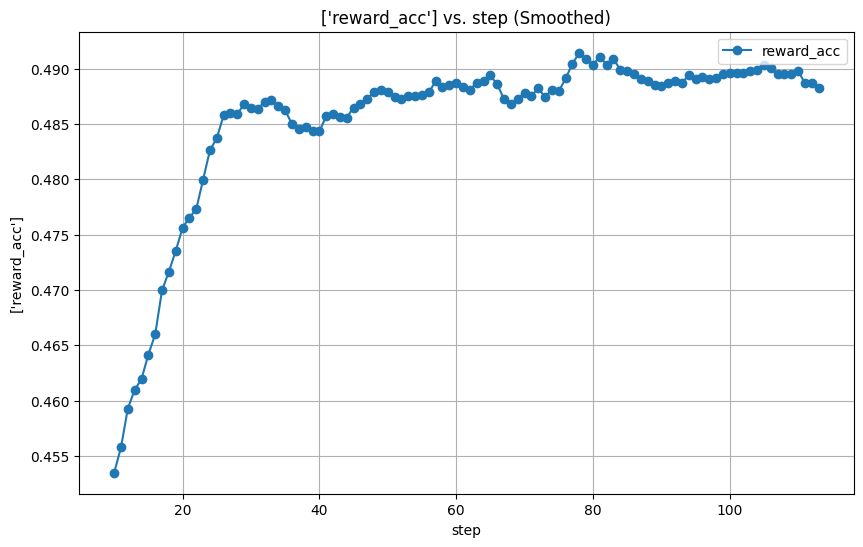

In [13]:
# File path
file_path = '/new_data/experiments/seungwook-phase1-merlinite-contrastive-bs256/training_params_and_metrics.jsonl'

draw_plot_for_x_y_with_smoothing(file_path, 'step', ['total_loss'], window_size=10)
draw_plot_for_x_y_without_smoothing(file_path, 'step', ['pos_reward', 'neg_reward'])
draw_plot_for_x_y_with_smoothing(file_path, 'step', ['reward_acc'], window_size=10)

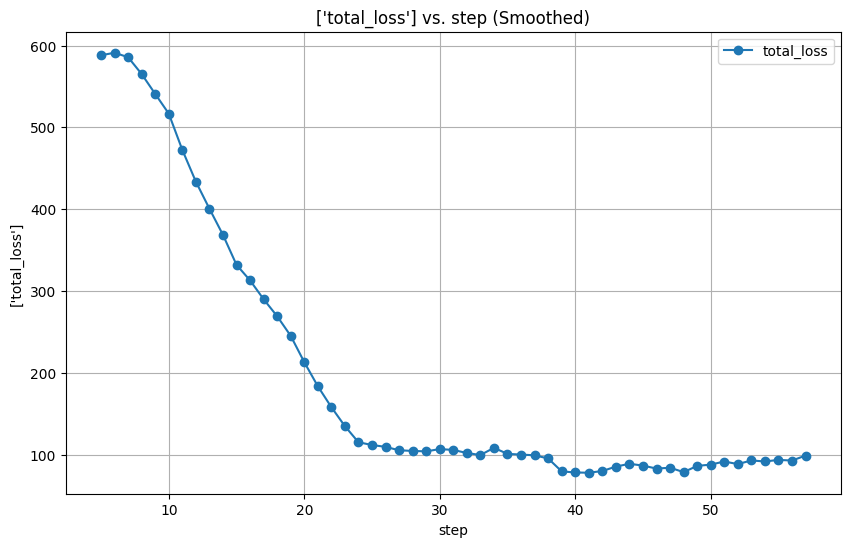

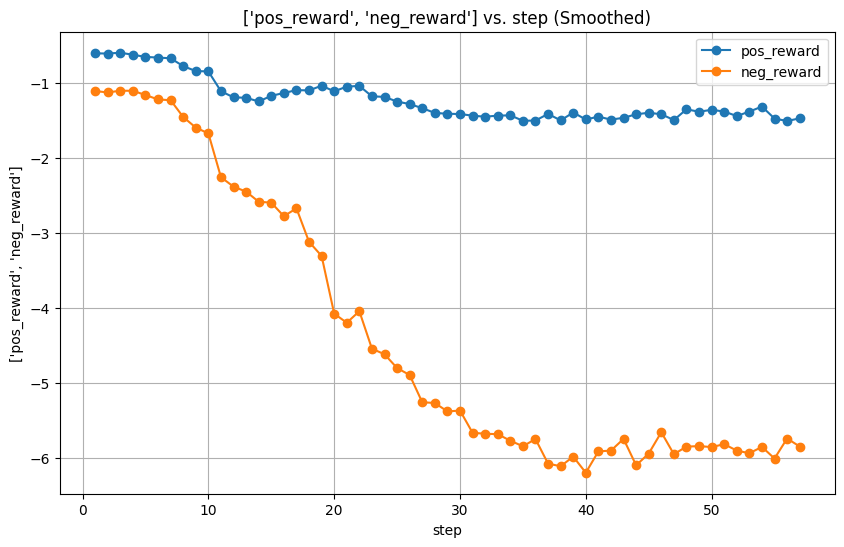

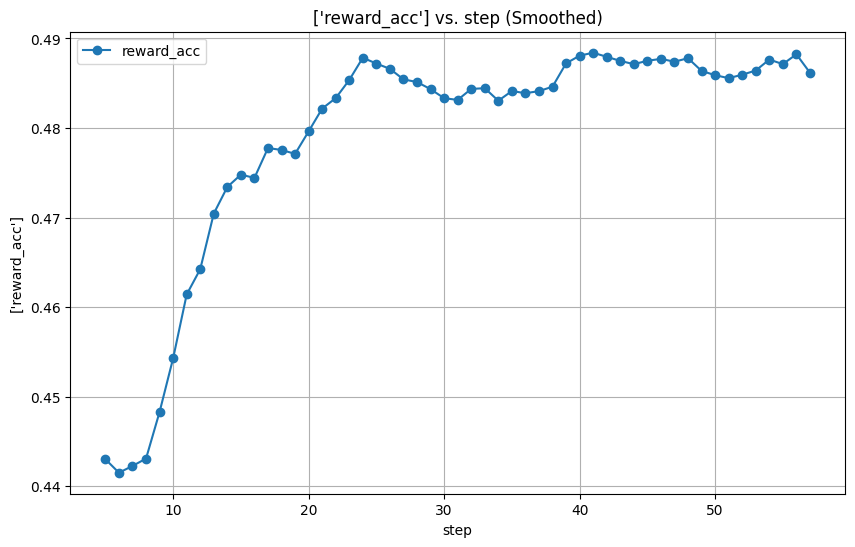

In [15]:
# File path
file_path = '/new_data/experiments/seungwook-phase1-merlinite-contrastive-bs512/training_params_and_metrics.jsonl'

draw_plot_for_x_y_with_smoothing(file_path, 'step', ['total_loss'], window_size=5)
draw_plot_for_x_y_without_smoothing(file_path, 'step', ['pos_reward', 'neg_reward'])
draw_plot_for_x_y_with_smoothing(file_path, 'step', ['reward_acc'], window_size=5)

In [35]:
data = read_jsonl(file_path)

[{'epoch': 0, 'step': 1, 'rank': 0, 'loss': 0.8337152600288391, 'overall_throughput': 9.954910877674644, 'lr': 0.0, 'cuda_mem_allocated': 20.68781280517578, 'cuda_malloc_retries': 0, 'num_loss_counted_tokens': 5078, 'batch_size': 120, 'total_loss': 0.012888801284134388, 'gradnorm': None, 'weight_norm': 146.80105590820312, 'pos_reward': -1.3331562280654907, 'neg_reward': -2.4652962684631348, 'reward_acc': 0.8999999761581421, 'timestamp': '2024-07-09T08:03:53.972188'}, {'epoch': 0, 'step': 2, 'rank': 0, 'loss': 0.7842727303504944, 'overall_throughput': 11.121679841257746, 'lr': 0.0, 'cuda_mem_allocated': 20.50748872756958, 'cuda_malloc_retries': 0, 'num_loss_counted_tokens': 4690, 'batch_size': 112, 'total_loss': 0.015510382130742073, 'gradnorm': None, 'weight_norm': 146.80105590820312, 'pos_reward': -1.3998377323150635, 'neg_reward': -2.302079677581787, 'reward_acc': 0.8035714030265808, 'timestamp': '2024-07-09T08:03:59.928060'}, {'epoch': 0, 'step': 3, 'rank': 0, 'loss': 0.871099174022

In [36]:
data[0]

{'epoch': 0,
 'step': 1,
 'rank': 0,
 'loss': 0.8337152600288391,
 'overall_throughput': 9.954910877674644,
 'lr': 0.0,
 'cuda_mem_allocated': 20.68781280517578,
 'cuda_malloc_retries': 0,
 'num_loss_counted_tokens': 5078,
 'batch_size': 120,
 'total_loss': 0.012888801284134388,
 'gradnorm': None,
 'weight_norm': 146.80105590820312,
 'pos_reward': -1.3331562280654907,
 'neg_reward': -2.4652962684631348,
 'reward_acc': 0.8999999761581421,
 'timestamp': '2024-07-09T08:03:53.972188'}

In [37]:
data[-1]

{'epoch': 0,
 'step': 57,
 'rank': 8,
 'loss': 0.02465762570500374,
 'overall_throughput': 37.62723442644655,
 'lr': 0.0,
 'cuda_mem_allocated': 20.391729831695557,
 'cuda_malloc_retries': 0,
 'num_loss_counted_tokens': 43631,
 'batch_size': 1040,
 'total_loss': 109.86780548095703,
 'gradnorm': 30.368122100830078,
 'weight_norm': 136.67225646972656,
 'pos_reward': -1.4761043787002563,
 'neg_reward': -5.861978054046631,
 'reward_acc': 0.47884616255760193,
 'timestamp': '2024-07-10T02:56:45.989607'}

59


('Merlinite 0.5',)
('Merlinite Phase 1.0 Contrastive 24960',)
20                 BlockchainSolanaDataset
21           BraintrustCodaHelpDeskDataset
22         EvaluatingLlmSurveyPaperDataset
23                      Llama2PaperDataset
24                      MiniSquadV2Dataset
25                  OriginOfCovid19Dataset
26           PatronusAIFinanceBenchDataset
27                  PaulGrahamEssayDataset
28                      Uber10KDataset2021
29    CustomRAGDataset / Training RAG Data
Name: Dataset, dtype: object 20    1.000
21    0.800
22    1.000
23    1.000
24    1.000
25    1.000
26    0.900
27    1.000
28    1.000
29    0.926
Name: Faithfulness, dtype: float64
('Merlinite Phase 1.0 SFT',)


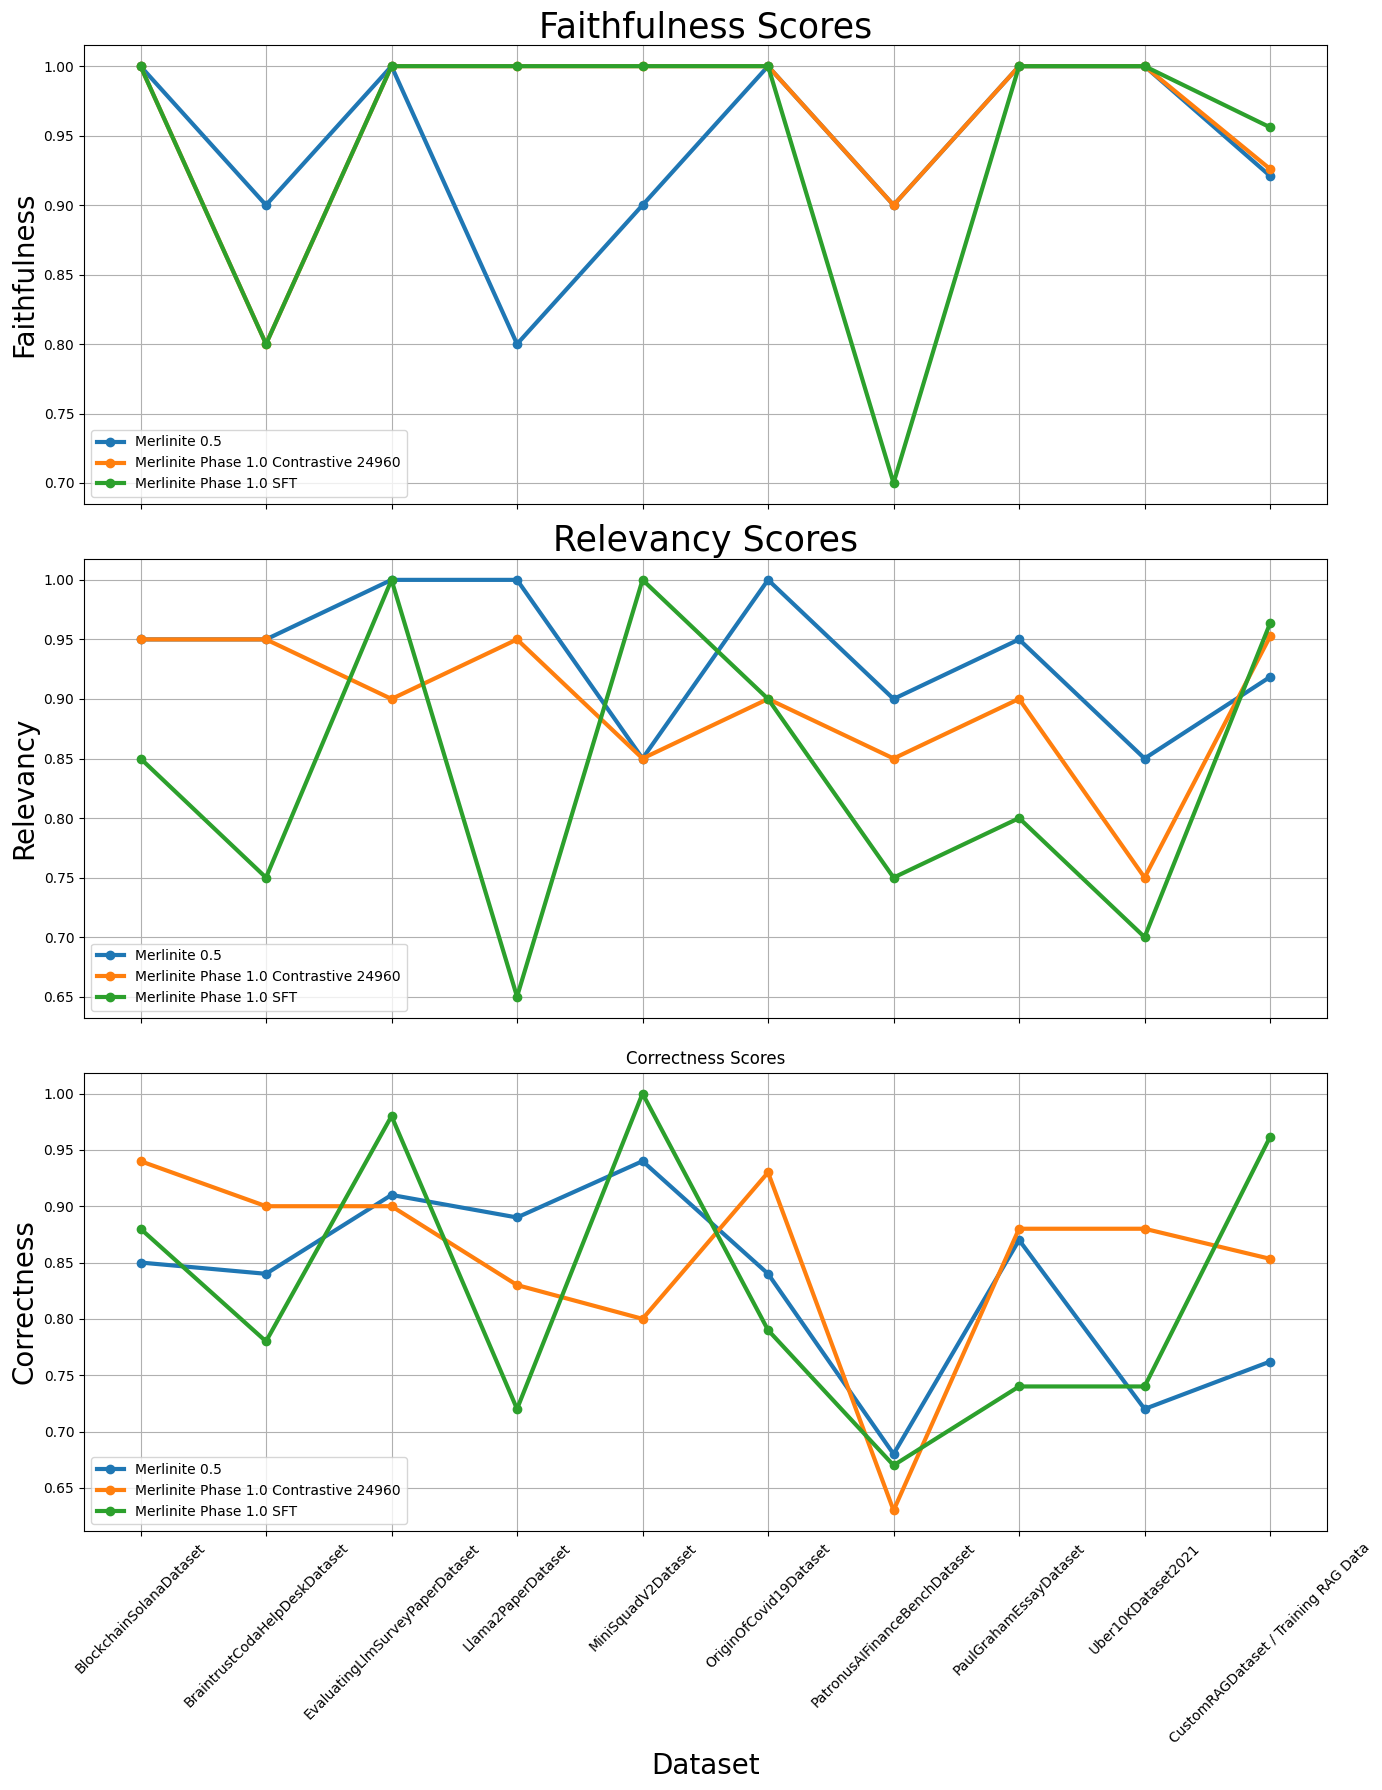

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Data organization
data = {
    "Model": [
        "Merlinite 0.5", "Merlinite 0.5", "Merlinite 0.5", "Merlinite 0.5", "Merlinite 0.5",
        "Merlinite 0.5", "Merlinite 0.5", "Merlinite 0.5", "Merlinite 0.5", "Merlinite 0.5",
        "Merlinite Phase 1.0 SFT", "Merlinite Phase 1.0 SFT", "Merlinite Phase 1.0 SFT", "Merlinite Phase 1.0 SFT", "Merlinite Phase 1.0 SFT",
        "Merlinite Phase 1.0 SFT", "Merlinite Phase 1.0 SFT", "Merlinite Phase 1.0 SFT", "Merlinite Phase 1.0 SFT", "Merlinite Phase 1.0 SFT",
        "Merlinite Phase 1.0 Contrastive 24960", "Merlinite Phase 1.0 Contrastive 24960", "Merlinite Phase 1.0 Contrastive 24960",
        "Merlinite Phase 1.0 Contrastive 24960", "Merlinite Phase 1.0 Contrastive 24960", "Merlinite Phase 1.0 Contrastive 24960",
        "Merlinite Phase 1.0 Contrastive 24960", "Merlinite Phase 1.0 Contrastive 24960", "Merlinite Phase 1.0 Contrastive 24960",
        "Merlinite Phase 1.0 Contrastive 24960"
    ] + ["Merlinite Phase 1.0 Contrastive 29952"] * 10,
    "Dataset": [
        "BlockchainSolanaDataset", "BraintrustCodaHelpDeskDataset", "EvaluatingLlmSurveyPaperDataset", "Llama2PaperDataset", "MiniSquadV2Dataset",
        "OriginOfCovid19Dataset", "PatronusAIFinanceBenchDataset", "PaulGrahamEssayDataset", "Uber10KDataset2021", "CustomRAGDataset / Training RAG Data",
        "BlockchainSolanaDataset", "BraintrustCodaHelpDeskDataset", "EvaluatingLlmSurveyPaperDataset", "Llama2PaperDataset", "MiniSquadV2Dataset",
        "OriginOfCovid19Dataset", "PatronusAIFinanceBenchDataset", "PaulGrahamEssayDataset", "Uber10KDataset2021", "CustomRAGDataset / Training RAG Data",
        "BlockchainSolanaDataset", "BraintrustCodaHelpDeskDataset", "EvaluatingLlmSurveyPaperDataset", "Llama2PaperDataset", "MiniSquadV2Dataset",
        "OriginOfCovid19Dataset", "PatronusAIFinanceBenchDataset", "PaulGrahamEssayDataset", "Uber10KDataset2021", "CustomRAGDataset / Training RAG Data"
    ],
    "Faithfulness": [
        1.0000, 0.9000, 1.0000, 0.8000, 0.9000, 1.0000, 0.9000, 1.0000, 1.0000, 0.9210,
        1.0000, 0.8000, 1.0000, 1.0000, 1.0000, 1.0000, 0.7000, 1.0000, 1.0000, 0.9560,
        1.0000, 0.8000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9000, 1.0000, 1.0000, 0.9260,
        1.0000, 0.9000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9000, 1.0000, 1.0000, 0.9230,
    ],
    "Relevancy": [
        0.9500, 0.9500, 1.0000, 1.0000, 0.8500, 1.0000, 0.9000, 0.9500, 0.8500, 0.9185,
        0.8500, 0.7500, 1.0000, 0.6500, 1.0000, 0.9000, 0.7500, 0.8000, 0.7000, 0.9635,
        0.9500, 0.9500, 0.9000, 0.9500, 0.8500, 0.9000, 0.8500, 0.9000, 0.7500, 0.9525,
        0.9000, 0.9500, 0.9000, 0.8500, 0.9000, 0.9000, 0.9000, 0.9500, 0.8000, 0.9500,
    ],
    "Correctness": [
        0.8500, 0.8400, 0.9100, 0.8900, 0.9400, 0.8400, 0.6800, 0.8700, 0.7200, 0.7621,
        0.8800, 0.7800, 0.9800, 0.7200, 1.0000, 0.7900, 0.6700, 0.7400, 0.7400, 0.9615,
        0.9400, 0.9000, 0.9000, 0.8300, 0.8000, 0.9300, 0.6300, 0.8800, 0.8800, 0.8533
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting the data
fig, ax = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Faithfulness plot
for key, grp in df.groupby(['Model']):
    ax[0].plot(grp['Dataset'], grp['Faithfulness'], marker='o', linestyle='-', label=key, linewidth=3)
ax[0].set_title('Faithfulness Scores', fontsize=25)
ax[0].set_ylabel('Faithfulness', fontsize=20)
ax[0].legend(loc='best')
ax[0].grid(True)

# Relevancy plot
for key, grp in df.groupby(['Model']):
    ax[1].plot(grp['Dataset'], grp['Relevancy'], marker='o', linestyle='-', label=key, linewidth=3)
ax[1].set_title('Relevancy Scores', fontsize=25)
ax[1].set_ylabel('Relevancy', fontsize=20)
ax[1].legend(loc='best')
ax[1].grid(True)

# Correctness plot
for key, grp in df.groupby(['Model']):
    ax[2].plot(grp['Dataset'], grp['Correctness'], marker='o', linestyle='-', label=key, linewidth=3)
ax[2].set_title('Correctness Scores')
ax[2].set_xlabel('Dataset', fontsize=20)
ax[2].set_ylabel('Correctness', fontsize=20)
ax[2].legend(loc='best')
ax[2].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()